In [234]:
import pandas as pd

In [235]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [236]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [237]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [238]:
df.drop('Car_Name',axis=1,inplace=True)

In [239]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [240]:
def f(year):
    year=2020-year
    return year

In [241]:
df['Year']=df['Year'].apply(f)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [242]:
x_all=df[['Year','Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
y=df[['Selling_Price']]

# Feature selection using correlation

In [243]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,-0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [244]:
x_corr=df[['Kms_Driven','Present_Price','Fuel_Type_Diesel']]

# Feature selection using Variance Threshold

In [245]:
from sklearn.feature_selection import VarianceThreshold
thresh=VarianceThreshold(threshold=0.1)
thresh.fit(x_all)

VarianceThreshold(threshold=0.1)

In [246]:
thresh.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True])

In [247]:
x_vt=[i for i in x_all.columns if i in x_all.columns[thresh.get_support()]]
print(x_vt)

['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']


In [248]:
x_vt=x_all[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']]
x_vt.shape

(301, 7)

# Feature selection using feature importances of RandomForrestRegressor and ExtraTreesRegressor

In [249]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
m=ExtraTreesRegressor()
n=RandomForestRegressor()
m.fit(x_all,y)
n.fit(x_all,y)

<ipython-input-249-24c2cdf82acc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(x_all,y)
<ipython-input-249-24c2cdf82acc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  n.fit(x_all,y)


RandomForestRegressor()

In [250]:
m.feature_importances_

array([0.07518881, 0.40212034, 0.04279665, 0.00043793, 0.21694086,
       0.01171505, 0.12980266, 0.12099769])

In [251]:
n.feature_importances_

array([8.40705337e-02, 8.74750231e-01, 2.82864727e-02, 1.93503114e-04,
       2.71111631e-03, 1.81170542e-03, 3.17657726e-03, 4.99986053e-03])

In [252]:
import matplotlib.pyplot as plt
fi_e=pd.Series(m.feature_importances_,index=x_all.columns)
fi_r=pd.Series(n.feature_importances_,index=x_all.columns)

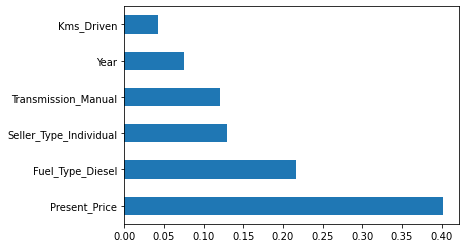

In [253]:
fi_e.nlargest(6).plot(kind='barh')

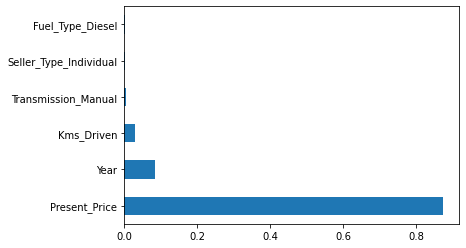

In [254]:
fi_r.nlargest(6).plot(kind='barh')

In [255]:
x_all.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [256]:
xfi_r=x_all[['Present_Price','Year','Kms_Driven','Transmission_Manual','Seller_Type_Individual']]
xfi_e=x_all[['Present_Price','Year','Fuel_Type_Diesel','Fuel_Type_Diesel','Seller_Type_Individual']]

In [257]:
# Following diff types of features are selected
# x_all - all features
# x_corr - using correlation
# x_vt - using variance threshold
# xfi_r - usning feature importances of random forrest
# xfi_e - using feature importances of extra trees regressor

In [258]:
from sklearn.model_selection import train_test_split
x_all_train,x_all_test,y_all_train,y_all_test=train_test_split(x_all,y,test_size=0.3,random_state=4)
x_corr_train,x_corr_test,y_corr_train,y_corr_test=train_test_split(x_corr,y,test_size=0.3,random_state=4)
x_vt_train,x_vt_test,y_vt_train,y_vt_test=train_test_split(x_vt,y,test_size=0.3,random_state=4)
xfi_r_train,xfi_r_test,yfi_r_train,yfi_r_test=train_test_split(xfi_r,y,test_size=0.3,random_state=4)
xfi_e_train,xfi_e_test,yfi_e_train,yfi_e_test=train_test_split(xfi_e,y,test_size=0.3,random_state=4)

In [259]:
import numpy as np
estimators=[int(i) for i in np.linspace(start=100,stop=1200,num=24)]
criterion=['mse','mae']
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append('None')            
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
bootstrap=['True','False']
oob_score=['True','False']

In [260]:
parameters={'n_estimators':estimators,
            'criterion':criterion ,
            'max_features':max_features ,
            'max_depth':max_depth ,
            'min_samples_split':min_samples_split ,
            'min_samples_leaf':min_samples_leaf ,
            'bootstrap':bootstrap ,
            'oob_score':oob_score}

In [261]:
model=RandomForestRegressor()

In [262]:
from sklearn.model_selection import RandomizedSearchCV
rand=RandomizedSearchCV(model,param_distributions=parameters,n_jobs=-1,n_iter=10, cv = 5, verbose=2, random_state=42)

In [263]:
rand.fit(x_all_train,y_all_train)
print(rand.best_score_)
print(rand.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.9s finished
C:\Users\aush1\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.856350723507514
RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30,
                      max_features='log2', n_estimators=578, oob_score='True')


In [264]:
rand.fit(x_corr_train,y_corr_train)
print(rand.best_score_)
print(rand.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished
C:\Users\aush1\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8462270024934989
RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30,
                      max_features='log2', n_estimators=578, oob_score='True')


In [265]:
rand.fit(x_vt_train,y_vt_train)
print(rand.best_score_)
print(rand.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.7s finished
C:\Users\aush1\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8409790797350635
RandomForestRegressor(bootstrap='False', max_depth=30, min_samples_split=15,
                      n_estimators=626, oob_score='True')


In [266]:
rand.fit(xfi_r_train,yfi_r_train)
print(rand.best_score_)
print(rand.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.6s finished
C:\Users\aush1\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8413885765574133
RandomForestRegressor(bootstrap='False', max_depth=30, min_samples_split=15,
                      n_estimators=626, oob_score='True')


In [267]:
rand.fit(xfi_e_train,yfi_e_train)
print(rand.best_score_)
print(rand.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.0s finished
C:\Users\aush1\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8767766703346593
RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30,
                      max_features='log2', n_estimators=578, oob_score='True')


In [268]:
model_all=RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30, max_features='log2', n_estimators=578, oob_score='True')
model_corr=RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30, max_features='log2', n_estimators=578, oob_score='True')
model_vt=RandomForestRegressor(bootstrap='False', max_depth=30, min_samples_split=15, n_estimators=626, oob_score='True')
model_e=RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30, max_features='log2', n_estimators=578, oob_score='True')
model_r=RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30, max_features='log2', n_estimators=578, oob_score='True')

In [269]:
model_all.fit(x_all_train,y_all_train)
model_corr.fit(x_corr_train,y_corr_train)
model_vt.fit(x_vt_train,y_vt_train)
model_e.fit(xfi_r_train,yfi_r_train)
model_r.fit(xfi_e_train,yfi_e_train)

<ipython-input-269-6ad9fcc7989f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_all.fit(x_all_train,y_all_train)
<ipython-input-269-6ad9fcc7989f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_corr.fit(x_corr_train,y_corr_train)
<ipython-input-269-6ad9fcc7989f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_vt.fit(x_vt_train,y_vt_train)
<ipython-input-269-6ad9fcc7989f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_e.fit(xfi_r_train,yfi_r_train)
<ipython-input-269-6ad9fcc7989f>:5: DataConversionWarning: A column-vector

RandomForestRegressor(bootstrap='False', criterion='mae', max_depth=30,
                      max_features='log2', n_estimators=578, oob_score='True')

In [270]:
p_all=model_all.predict(x_all_test)
p_corr=model_corr.predict(x_corr_test)
p_vt=model_vt.predict(x_vt_test)
p_e=model_e.predict(xfi_e_test)
p_r=model_r.predict(xfi_r_test)

In [271]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('With all features')
print('MAE:', mean_absolute_error(y_all_test, p_all))
print('MSE:', mean_squared_error(y_all_test,p_all))
print('RMSE:', np.sqrt(mean_squared_error(y_all_test,p_all)))
print('---------------------------------------------------------------------------------------------------------------------')
print('With correlation')
print('MAE:', mean_absolute_error(y_corr_test, p_corr))
print('MSE:', mean_squared_error(y_corr_test,p_corr))
print('RMSE:', np.sqrt(mean_squared_error(y_corr_test,p_corr)))
print('---------------------------------------------------------------------------------------------------------------------')
print('With variance threshold')
print('MAE:', mean_absolute_error(y_vt_test, p_vt))
print('MSE:', mean_squared_error(y_vt_test,p_vt))
print('RMSE:', np.sqrt(mean_squared_error(y_vt_test,p_vt)))
print('---------------------------------------------------------------------------------------------------------------------')
print('With feature importance of extraatreesregressor')
print('MAE:', mean_absolute_error(yfi_e_test, p_e))
print('MSE:', mean_squared_error(yfi_e_test,p_e))
print('RMSE:', np.sqrt(mean_squared_error(yfi_e_test,p_e)))
print('---------------------------------------------------------------------------------------------------------------------')
print('With feature importance of randomforrestregressor')
print('MAE:', mean_absolute_error(yfi_r_test, p_r))
print('MSE:', mean_squared_error(yfi_r_test,p_r))
print('RMSE:', np.sqrt(mean_squared_error(yfi_r_test,p_r)))

With all features
MAE: 0.878259154340472
MSE: 3.366874336638688
RMSE: 1.8349044489124462
---------------------------------------------------------------------------------------------------------------------
With correlation
MAE: 1.0861490931214142
MSE: 4.773938898777997
RMSE: 2.1849345296319513
---------------------------------------------------------------------------------------------------------------------
With variance threshold
MAE: 0.8175663934089048
MSE: 3.3744485509964575
RMSE: 1.8369672155475332
---------------------------------------------------------------------------------------------------------------------
With feature importance of extraatreesregressor
MAE: 1.557379272976162
MSE: 7.112766174974814
RMSE: 2.666976973086722
---------------------------------------------------------------------------------------------------------------------
With feature importance of randomforrestregressor
MAE: 2.60776103654131
MSE: 10.658857662665373
RMSE: 3.264790600125125


In [272]:
import pickle
pickle.dump(model_vt, open('model.pkl','wb'))